<a href="https://colab.research.google.com/github/davidlrosenblum/colab-sample/blob/main/Connect_sandbox_with_the_Python_Driver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting with the Python Driver

Within this tutorial, we’ll give you some best practices for connecting and interacting with Neo4j and the Graph Data Science Library.

For more information about the Python Driver, head over to the [Neo4j Driver Manual](https://neo4j.com/docs/driver-manual/current/get-started). 


# Install the latest stable version of the Python Driver:

```pip install neo4j```

 
To find the latest stable version of the Python Driver, visit https://pypi.org/project/neo4j/

To find a list of all available releases, visit https://pypi.org/simple/neo4j/

In [ ]:
!pip install neo4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 7.9 MB/s 
  Created wheel for neo4j: filename=neo4j-4.4.4-py3-none-any.whl size=116554 sha256=f9598c89e4a9eec3431ae8767320faedc76b8581e6571737e84db09d0ddc0b47
  Stored in directory: /root/.cache/pip/wheels/cf/c9/60/dab99fdca0093b46a9c9f5d5b99317c9d323c97d2f5af24e23
Successfully built neo4j


# Importing the driver


The main import you’ll need is the `GraphDatabase` import. This will allow you to create a driver which we will use to connect to and run queries against the database.
 
```from neo4j import GraphDatabase```


In [ ]:
# Driver import
from neo4j import GraphDatabase

# Connection Details

Connecting to your instance will need the three inputs:

*   Database Connection URI
*   Database Username
*   Database Password

You will have been given the Database Username and Password when you created your database. Copy and paste these into each of the relevant fields labelled: `AURA_USERNAME` & `AURA_PASSWORD`.


You can find your database connection URI located on the database card under the Database section within Aura.
Copy and paste this into the field labelled: `AURA_CONNECTION_URI`

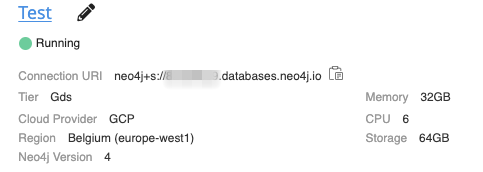

In [ ]:
# Connection Details
# Aura queries use an encrypted connection using the "neo4j+s" URI scheme
AURA_CONNECTION_URI = "neo4j://44.198.166.2:7687"
AURA_USERNAME = "neo4j"
AURA_PASSWORD = "web-person-egg"

# Driver Object

Constructing a driver instance requires the connection URI (`AURA_CONNECTION_URI`) and authentication information (`AURA_USERNAME` & `AURA_PASSWORD`).

We'll use the Driver object to create Sessions with the database, this will allow you to run Queries.


In [ ]:
# Driver Instantiation
driver = GraphDatabase.driver(AURA_CONNECTION_URI, auth=(AURA_USERNAME, AURA_PASSWORD))

# Running a query

Below we'll run two example queries. 

The first will get the version of GDS running on the database.

The second will ask GDS to list all the procedures availabile within the library and return the first 5

In [ ]:
# Cypher Query
list_gds_version_query = """
RETURN gds.version() AS version
"""

# Create a driver session
with driver.session() as session:
  # use the driver session to run a query
  # .data() gives us access the results as an array of dicts
  results = session.run(list_gds_version_query).data()
  print(results)


[{'version': '2.0.1'}]


In [ ]:
import json

list_all_gds_procedures_query = """
call gds.list()
"""

# Create a driver session
with driver.session() as session:
  # use the driver session to run a query
  # .data() gives us access the results as an array of dicts
  results = session.run(list_all_gds_procedures_query).data()
  
  # print the first 5 results
  for procedure in results[:5]:
    print(json.dumps(procedure, indent=2))


{
  "name": "gds.allShortestPaths.delta.mutate",
  "description": "The Delta Stepping shortest path algorithm computes the shortest (weighted) path between one node and any other node in the graph. The computation is run multi-threaded",
  "signature": "gds.allShortestPaths.delta.mutate(graphName :: STRING?, configuration = {} :: MAP?) :: (relationshipsWritten :: INTEGER?, mutateMillis :: INTEGER?, postProcessingMillis :: INTEGER?, preProcessingMillis :: INTEGER?, computeMillis :: INTEGER?, configuration :: MAP?)",
  "type": "procedure"
}
{
  "name": "gds.allShortestPaths.delta.mutate.estimate",
  "description": "Returns an estimation of the memory consumption for that procedure.",
  "signature": "gds.allShortestPaths.delta.mutate.estimate(graphNameOrConfiguration :: ANY?, algoConfiguration :: MAP?) :: (requiredMemory :: STRING?, treeView :: STRING?, mapView :: MAP?, bytesMin :: INTEGER?, bytesMax :: INTEGER?, nodeCount :: INTEGER?, relationshipCount :: INTEGER?, heapPercentageMin :: F

# Closing your driver

When you're finished interacting with your instance, you should close your driver connection.

In [ ]:
# Close the Driver connection
driver.close()

# References


## Documentation
* Neo4j GDSL Documentation: https://neo4j.com/docs/graph-data-science
* Neo4j Driver Documentation:
https://neo4j.com/docs/driver-manual/current/get-started/
* Neo4j Developer Documentation:
https://neo4j.com/developer

## Cypher
* Learn more about the Cypher syntax:
https://neo4j.com/docs/cypher-manual/current/
* The Cypher Reference Card is also a great resource for understanding how to use Cypher keywords:
https://neo4j.com/docs/cypher-refcard/current/

## Modelling
* Data modelling guidelines:
https://neo4j.com/developer/guide-data-modeling/
* Data modelling design:
https://neo4j.com/developer/modeling-designs/
* Refactoring a data model:
https://neo4j.com/developer/graph-model-refactoring/


